In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("D:/Kartikey/Project/.venv/Preprocessed dataset.csv")

# Separate features and target
X = data.drop(columns=[" Label"]) 
y = data[" Label"]

# Normalize/Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target labels if it's a classification problem
y_encoded = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Reshape the input data to fit the CNN (adding an extra dimension for "channels")
# CNN expects the data in the shape (samples, time_steps, features), so we reshape it to 3D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # (samples, features, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # (samples, features, 1)

# Define the CNN model
model = Sequential()

# Adding a 1D Convolutional layer (since it's 1D data)
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# Adding another Convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flattening the output from the convolutional layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(128, activation='relu'))

# Output layer with softmax (for multi-class classification)
model.add(Dense(y_encoded.shape[1], activation='softmax'))  # Output layer with the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


ValueError: invalid literal for int() with base 10: 'BENIGN'

In [5]:
#Smote to handle class imbalance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = data.drop(' Label', axis = 1)
y = data[' Label']

#split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the preprocessed dataset
df = pd.read_csv('D:/Kartikey/Project/.venv/Preprocessed dataset.csv')

# Ensure that there is no leading space in column names
df.columns = df.columns.str.strip()

# Split data into features and target
X = df.drop('Label', axis=1)  # Make sure there is no leading space in 'Label' column name
y = df['Label']

# Label encode the target labels (non-numeric to numeric conversion)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data (scaling)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Convert DataFrame to NumPy array for reshaping and CNN input
X_train_resampled = np.array(X_train_resampled)
X_test = np.array(X_test)

# Reshape X to 3D (samples, rows, columns, channels) for CNN input
X_train_resampled = X_train_resampled.reshape(-1, X_train_resampled.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

# Convert labels to categorical (one-hot encoding)
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)  # Apply one-hot encoding for y_test as well

# Define the CNN model
model = models.Sequential()

# Add the 1D convolutional layer
model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)))
model.add(layers.MaxPooling1D(2))

# Add a second convolutional layer
model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

# Add a flatten layer to convert 2D to 1D
model.add(layers.Flatten())

# Add fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(y_train_resampled.shape[1], activation='softmax'))  # Output layer (softmax for multi-class classification)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Save the trained model (optional)
model.save('cnn_model_cicids2017.h5')




d:\Kartikey\Project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 76, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 38, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 36, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,935 (1.23 MB)

 Trainable params: 321,935 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 889s 3ms/step - accuracy: 0.9319 - loss: 0.1462 - val_accuracy: 0.9621 - val_loss: 0.1510
Epoch 2/10
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 886s 3ms/step - accuracy: 0.9456 - loss: 0.1148 - val_accuracy: 0.9619 - val_loss: 0.1506
Epoch 3/10
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 892s 3ms/step - accuracy: 0.9453 - loss: 0.1179 - val_accuracy: 0.9567 - val_loss: 0.1594
Epoch 4/10
216566/343765 ━━━━━━━━━━━━━━━━━━━━ 5:48 3ms/step - accuracy: 0.9443 - loss: 0.1227

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping

# Load the preprocessed dataset
df = pd.read_csv('D:/Kartikey/Project/.venv/Preprocessed dataset.csv')

# Ensure that there is no leading space in column names
df.columns = df.columns.str.strip()

# Split data into features and target
X = df.drop('Label', axis=1)  # Make sure there is no leading space in 'Label' column name
y = df['Label']

# Label encode the target labels (non-numeric to numeric conversion)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data (scaling)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Convert DataFrame to NumPy array for reshaping and CNN input
X_train_resampled = np.array(X_train_resampled)
X_test = np.array(X_test)

# Reshape X to 3D (samples, rows, columns, channels) for CNN input
X_train_resampled = X_train_resampled.reshape(-1, X_train_resampled.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

# Convert labels to categorical (one-hot encoding)
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)  # Apply one-hot encoding for y_test as well

# Define the CNN model
model = models.Sequential()

# Add the 1D convolutional layer
model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)))
model.add(layers.MaxPooling1D(2))

# Add a second convolutional layer
model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

# Add a flatten layer to convert 2D to 1D
model.add(layers.Flatten())

# Add fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(y_train_resampled.shape[1], activation='softmax'))  # Output layer (softmax for multi-class classification)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
#history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=64, validation_data=(X_test, y_test))
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Save the trained model (optional)
model.save('cnn_model_cicids2017.h5')


d:\Kartikey\Project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 76, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 38, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 36, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,935 (1.23 MB)

 Trainable params: 321,935 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 921s 3ms/step - accuracy: 0.9324 - loss: 0.1462 - val_accuracy: 0.9658 - val_loss: 0.1215
Epoch 2/10
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 980s 3ms/step - accuracy: 0.9457 - loss: 0.1142 - val_accuracy: 0.9676 - val_loss: 0.1183
Epoch 3/10
109887/343765 ━━━━━━━━━━━━━━━━━━━━ 11:15 3ms/step - accuracy: 0.9460 - loss: 0.1144

KeyboardInterrupt: 

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the preprocessed dataset
df = pd.read_csv('D:/Kartikey/Project/.venv/Preprocessed dataset.csv')

# Ensure that there is no leading space in column names
df.columns = df.columns.str.strip()

# Split data into features and target
X = df.drop('Label', axis=1)  # Make sure there is no leading space in 'Label' column name
y = df['Label']

# Label encode the target labels (non-numeric to numeric conversion)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data (scaling)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Convert DataFrame to NumPy array for reshaping and CNN input
X_train_resampled = np.array(X_train_resampled)
X_test = np.array(X_test)

# Reshape X to 3D (samples, rows, columns, channels) for CNN input
X_train_resampled = X_train_resampled.reshape(-1, X_train_resampled.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

# Convert labels to categorical (one-hot encoding)
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)  # Apply one-hot encoding for y_test as well

# Define the CNN model
model = models.Sequential()

# Add the 1D convolutional layer with LeakyReLU activation
model.add(layers.Conv1D(64, 3, input_shape=(X_train_resampled.shape[1], 1)))
model.add(layers.LeakyReLU(alpha=0.01))  # LeakyReLU with a small negative slope for negative values
model.add(layers.MaxPooling1D(2))

# Add a second convolutional layer with LeakyReLU activation
model.add(layers.Conv1D(128, 3))
model.add(layers.LeakyReLU(alpha=0.01))  # LeakyReLU with a small negative slope for negative values
model.add(layers.MaxPooling1D(2))

# Add a flatten layer to convert 2D to 1D
model.add(layers.Flatten())

# Add fully connected layers with LeakyReLU
model.add(layers.Dense(128))
model.add(layers.LeakyReLU(alpha=0.01))  # LeakyReLU with a small negative slope for negative values
model.add(layers.Dropout(0.5))  # Dropout for regularization

# Add the output layer (softmax for multi-class classification)
model.add(layers.Dense(y_train_resampled.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model with early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop])

# Save the trained model (optional)
model.save('cnn_model_cicids2017.h5')


d:\Kartikey\Project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Kartikey\Project\.venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 76, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 76, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 38, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 36, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 36, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,935 (1.23 MB)

 Trainable params: 321,935 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 945s 3ms/step - accuracy: 0.9333 - loss: 0.1435 - val_accuracy: 0.9629 - val_loss: 0.1169
Epoch 2/10
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 1032s 3ms/step - accuracy: 0.9436 - loss: 0.1874 - val_accuracy: 0.9635 - val_loss: 0.1307
Epoch 3/10
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 1131s 3ms/step - accuracy: 0.9446 - loss: 1.0263 - val_accuracy: 0.9671 - val_loss: 0.1099
Epoch 4/10
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 1287s 4ms/step - accuracy: 0.9448 - loss: 1.3554 - val_accuracy: 0.9609 - val_loss: 0.1483
Epoch 5/10
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 1503s 4ms/step - accuracy: 0.9443 - loss: 0.1860 - val_accuracy: 0.9624 - val_loss: 0.1584
Epoch 6/10
343765/343765 ━━━━━━━━━━━━━━━━━━━━ 1730s 5ms/step - accuracy: 0.9439 - loss: 1.7273 - val_accuracy: 0.9637 - val_loss: 0.1526


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the preprocessed dataset
df = pd.read_csv('D:/Kartikey/Project/.venv/Preprocessed dataset.csv')

# Ensure that there is no leading space in column names
df.columns = df.columns.str.strip()

# Split data into features and target
X = df.drop('Label', axis=1)  # Make sure there is no leading space in 'Label' column name
y = df['Label']

# Label encode the target labels (non-numeric to numeric conversion)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data (scaling)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Convert DataFrame to NumPy array for reshaping and CNN input
X_train_resampled = np.array(X_train_resampled)
X_test = np.array(X_test)

# Reshape X to 3D (samples, rows, columns, channels) for CNN input
X_train_resampled = X_train_resampled.reshape(-1, X_train_resampled.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

# Convert labels to categorical (one-hot encoding)
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)  # Apply one-hot encoding for y_test as well

# Define the CNN model
model = models.Sequential()

# Add the 1D convolutional layer
model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)))
model.add(layers.MaxPooling1D(2))

# Add a second convolutional layer
model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

# Add a flatten layer to convert 2D to 1D
model.add(layers.Flatten())

# Add fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(y_train_resampled.shape[1], activation='softmax'))  # Output layer (softmax for multi-class classification)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Save the trained model (optional)
model.save('cnn_model_cicids20171.h5')


d:\Kartikey\Project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 76, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 38, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 36, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,935 (1.23 MB)

 Trainable params: 321,935 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
284450/343765 ━━━━━━━━━━━━━━━━━━━━ 2:36 3ms/step - accuracy: 0.9320 - loss: 0.1490

KeyboardInterrupt: 

In [1]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('D:/Kartikey/Project/.venv/Preprocessed dataset.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Selected features
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

# Features and target
X = df[selected_features]
y = df['Label']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance with SMOTE (parallelized using n_jobs)
smote = SMOTE(random_state=42, n_jobs=12)  # Use all available cores
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Reshape for CNN (samples, timesteps, features)
X_train_resampled = np.expand_dims(X_train_resampled, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# One-hot encode labels
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Define the CNN model
model = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(y_train_resampled.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, 
                    epochs=20, batch_size=64, 
                    validation_data=(X_test, y_test))

# Save the model
model.save('cnn_model_selected_features.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions for classification metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()



d:\Kartikey\Project\.venv\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
d:\Kartikey\Project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 796s 2ms/step - accuracy: 0.9314 - loss: 0.1415 - val_accuracy: 0.9618 - val_loss: 0.1477
Epoch 2/20
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 809s 2ms/step - accuracy: 0.9453 - loss: 0.1106 - val_accuracy: 0.9648 - val_loss: 0.1290
Epoch 3/20
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 822s 2ms/step - accuracy: 0.9453 - loss: 0.1134 - val_accuracy: 0.9652 - val_loss: 0.1233
Epoch 4/20
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 859s 2ms/step - accuracy: 0.9447 - loss: 0.1171 - val_accuracy: 0.9610 - val_loss: 0.1505
Epoch 5/20
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 871s 3ms/step - accuracy: 0.9428 - loss: 0.1232 - val_accuracy: 0.9599 - val_loss: 0.1510
Epoch 6/20
143454/343721 ━━━━━━━━━━━━━━━━━━━━ 7:43 2ms/step - accuracy: 0.9411 - loss: 0.1285

KeyboardInterrupt: 

d:\Kartikey\Project\.venv\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
d:\Kartikey\Project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 864s 2ms/step - accuracy: 0.9197 - loss: 0.1800 - val_accuracy: 0.9607 - val_loss: 0.1328
Epoch 2/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 833s 2ms/step - accuracy: 0.9415 - loss: 0.1154 - val_accuracy: 0.9647 - val_loss: 0.1165
Epoch 3/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 852s 2ms/step - accuracy: 0.9448 - loss: 0.1086 - val_accuracy: 0.9710 - val_loss: 0.1042
Epoch 4/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 826s 2ms/step - accuracy: 0.9473 - loss: 0.1029 - val_accuracy: 0.9723 - val_loss: 0.0966
Epoch 5/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 826s 2ms/step - accuracy: 0.9481 - loss: 0.1000 - val_accuracy: 0.9802 - val_loss: 0.0683
Epoch 6/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 834s 2ms/step - accuracy: 0.9491 - loss: 0.0974 - val_accuracy: 0.9845 - val_loss: 0.0607
Epoch 7/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 862s 3ms/step - accuracy: 0.9496 - loss: 0.0961 - val_accuracy: 0.9855 - val_loss: 0.0573
Epoch 8/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 88

Test Accuracy: 98.52%
23633/23633 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step

Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      0.98      0.99    628518
                       Bot       0.09      1.00      0.17       584
                      DDoS       1.00      1.00      1.00     38404
             DoS GoldenEye       0.94      1.00      0.97      3086
                  DoS Hulk       0.97      1.00      0.98     51854
          DoS Slowhttptest       0.86      1.00      0.92      1568
             DoS slowloris       0.96      0.99      0.98      1616
               FTP-Patator       1.00      1.00      1.00      1779
                Heartbleed       1.00      0.67      0.80         3
              Infiltration       0.06      0.91      0.12        11
                  PortScan       0.98      1.00      0.99     27208
               SSH-Patator       0.85      1.00      0.92       966
  Web Attack � Brute Fo

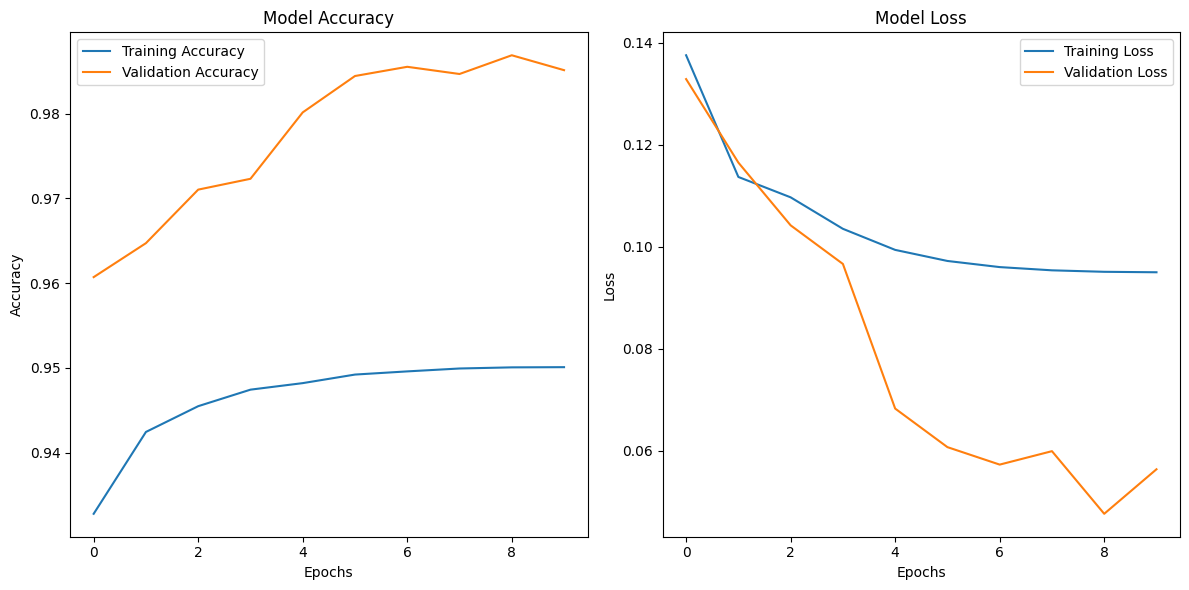

In [1]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('D:/Kartikey/Project/.venv/Preprocessed dataset.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Selected features
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

# Features and target
X = df[selected_features]
y = df['Label']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance with SMOTE (parallelized using n_jobs)
smote = SMOTE(random_state=42, n_jobs=12)  # Use all available cores
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Reshape for CNN (samples, timesteps, features)
X_train_resampled = np.expand_dims(X_train_resampled, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# One-hot encode labels
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Set a custom learning rate (e.g., 0.0001)
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Define the CNN model
model = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(y_train_resampled.shape[1], activation='softmax')
])

# Compile the model with custom learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, 
                    epochs=10, batch_size=64, 
                    validation_data=(X_test, y_test))

# Save the model
model.save('cnn_model_selected_features_with_lr.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions for classification metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()


d:\Kartikey\Project\.venv\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
d:\Kartikey\Project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 2122s 6ms/step - accuracy: 0.9283 - loss: 0.1541 - val_accuracy: 0.9657 - val_loss: 0.1108
Epoch 2/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 2124s 6ms/step - accuracy: 0.9472 - loss: 0.1041 - val_accuracy: 0.9710 - val_loss: 0.0919
Epoch 3/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 2181s 6ms/step - accuracy: 0.9494 - loss: 0.0971 - val_accuracy: 0.9768 - val_loss: 0.0659
Epoch 4/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 2161s 6ms/step - accuracy: 0.9504 - loss: 0.0943 - val_accuracy: 0.9844 - val_loss: 0.0615
Epoch 5/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 2179s 6ms/step - accuracy: 0.9508 - loss: 0.0932 - val_accuracy: 0.9873 - val_loss: 0.0463
Epoch 6/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 2241s 7ms/step - accuracy: 0.9509 - loss: 0.0925 - val_accuracy: 0.9892 - val_loss: 0.0472
Epoch 7/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 2317s 7ms/step - accuracy: 0.9511 - loss: 0.0920 - val_accuracy: 0.9894 - val_loss: 0.0407
Epoch 8/10
343721/343721 ━━━━━━━━━━━━━━━━

Test Accuracy: 98.93%
23633/23633 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step

Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      0.99      0.99    628518
                       Bot       0.12      0.99      0.22       584
                      DDoS       1.00      1.00      1.00     38404
             DoS GoldenEye       0.94      1.00      0.97      3086
                  DoS Hulk       0.98      1.00      0.99     51854
          DoS Slowhttptest       0.86      1.00      0.92      1568
             DoS slowloris       0.92      0.99      0.96      1616
               FTP-Patator       1.00      1.00      1.00      1779
                Heartbleed       1.00      0.67      0.80         3
              Infiltration       0.04      0.91      0.08        11
                  PortScan       0.99      1.00      0.99     27208
               SSH-Patator       0.85      1.00      0.92       966
  Web Attack � Brute Fo

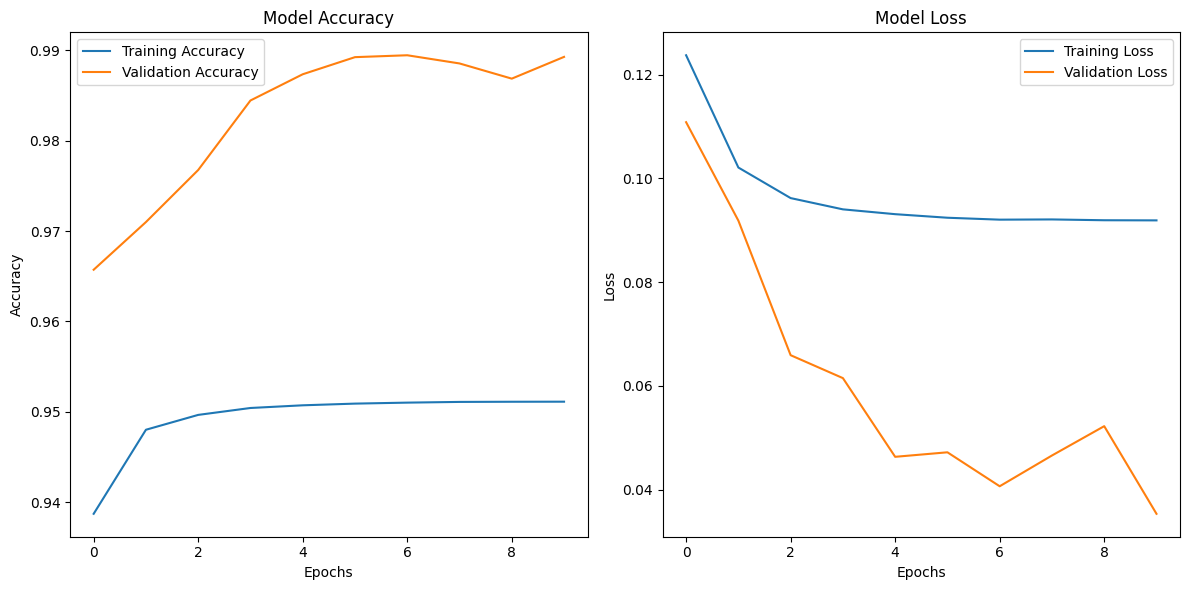

In [2]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('D:/Kartikey/Project/.venv/Preprocessed dataset.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Selected features
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

# Features and target
X = df[selected_features]
y = df['Label']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42, n_jobs=12)  # Use all available cores
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Reshape for CNN (samples, timesteps, features)
X_train_resampled = np.expand_dims(X_train_resampled, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# One-hot encode labels
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Set a custom learning rate
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Define the CNN model with doubled neurons
model = models.Sequential([
    layers.Conv1D(128, 3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)),  # 64 -> 128 filters
    layers.MaxPooling1D(2),
    layers.Conv1D(256, 3, activation='relu'),  # 128 -> 256 filters
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),  # 128 -> 256 neurons
    layers.Dropout(0.5),
    layers.Dense(y_train_resampled.shape[1], activation='softmax')  # Output layer remains unchanged
])

# Compile the model with custom learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, 
                    epochs=10, batch_size=64, 
                    validation_data=(X_test, y_test))

# Save the updated model
model.save('cnn_model_doubled_neurons.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions for classification metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('D:/Kartikey/Project/.venv/Preprocessed dataset.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Selected features
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

# Features and target
X = df[selected_features]
y = df['Label']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42, n_jobs=-1)  # Use all available cores
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Reshape for CNN (samples, timesteps, features)
X_train_resampled = np.expand_dims(X_train_resampled, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# One-hot encode labels
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Set a custom learning rate
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Define the CNN model with 50% more neurons
model = models.Sequential([
    layers.Conv1D(192, 3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)),  # 128 -> 192 filters
    layers.MaxPooling1D(2),
    layers.Conv1D(384, 3, activation='relu'),  # 256 -> 384 filters
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(384, activation='relu'),  # 256 -> 384 neurons
    layers.Dropout(0.5),
    layers.Dense(y_train_resampled.shape[1], activation='softmax')  # Output layer remains unchanged
])

# Compile the model with custom learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, 
                    epochs=10, batch_size=64, 
                    validation_data=(X_test, y_test))

# Save the updated model
model.save('cnn_model_50_percent_more_neurons.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions for classification metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()


d:\Kartikey\Project\.venv\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
d:\Kartikey\Project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 3949s 11ms/step - accuracy: 0.9311 - loss: 0.1462 - val_accuracy: 0.9694 - val_loss: 0.0989
Epoch 2/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 4243s 12ms/step - accuracy: 0.9483 - loss: 0.1009 - val_accuracy: 0.9717 - val_loss: 0.0877
Epoch 3/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 4513s 13ms/step - accuracy: 0.9496 - loss: 0.0961 - val_accuracy: 0.9860 - val_loss: 0.0545
Epoch 4/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 5139s 15ms/step - accuracy: 0.9507 - loss: 0.0932 - val_accuracy: 0.9883 - val_loss: 0.0432
Epoch 5/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 6030s 18ms/step - accuracy: 0.9510 - loss: 0.0922 - val_accuracy: 0.9872 - val_loss: 0.0426
Epoch 6/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 6665s 19ms/step - accuracy: 0.9511 - loss: 0.0919 - val_accuracy: 0.9886 - val_loss: 0.0419
Epoch 7/10
343721/343721 ━━━━━━━━━━━━━━━━━━━━ 7389s 21ms/step - accuracy: 0.9512 - loss: 0.0915 - val_accuracy: 0.9889 - val_loss: 0.0458
Epoch 8/10
 66353/343721 ━━━━━━━━━

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Maximize CPU utilization
os.environ["OMP_NUM_THREADS"] = "24"  
os.environ["TF_NUM_INTRAOP_THREADS"] = "24"
os.environ["TF_NUM_INTEROP_THREADS"] = "24"
tf.config.threading.set_intra_op_parallelism_threads(24)
tf.config.threading.set_inter_op_parallelism_threads(24)

# Load the dataset
df = pd.read_csv('D:/Kartikey/Project/.venv/Preprocessed dataset.csv')
df.columns = df.columns.str.strip()

# Features and target
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]  # Your feature list
X = df[selected_features]
y = df['Label']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42, n_jobs=12)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Reshape for CNN
X_train_resampled = np.expand_dims(X_train_resampled, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# One-hot encode labels
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Create TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_resampled, y_train_resampled))
train_dataset = train_dataset.batch(128).prefetch(tf.data.AUTOTUNE).map(lambda x, y: (x, y), num_parallel_calls=tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(128).prefetch(tf.data.AUTOTUNE)

# Define the CNN model
model = models.Sequential([
    layers.Conv1D(240, 3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(480, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(480, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(15, activation='softmax')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predictions and classification report
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(np.concatenate([y for x, y in test_dataset], axis=0), axis=1)

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Plotting accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()


d:\Kartikey\Project\.venv\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Epoch 1/10


d:\Kartikey\Project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171861/171861 ━━━━━━━━━━━━━━━━━━━━ 3166s 18ms/step - accuracy: 0.9912 - loss: 0.0311 - val_accuracy: 2.5918e-04 - val_loss: 45.3422
Epoch 2/10
  6455/171861 ━━━━━━━━━━━━━━━━━━━━ 50:35 18ms/step - accuracy: 0.9515 - loss: 0.5221

KeyboardInterrupt: 

In [9]:
import os

# Set environment variables for CPU utilization **before importing TensorFlow**
#os.environ["OMP_NUM_THREADS"] = "20"  # Adjust based on your CPU
#os.environ["TF_NUM_INTRAOP_THREADS"] = "20"
#os.environ["TF_NUM_INTEROP_THREADS"] = "20"

# Now import TensorFlow and other libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Configure TensorFlow threading settings
#tf.config.threading.set_intra_op_parallelism_threads(20)
#tf.config.threading.set_inter_op_parallelism_threads(20)

# Load the dataset
df = pd.read_csv('D:/Kartikey/Project/.venv/Preprocessed dataset.csv')
df.columns = df.columns.str.strip()

# Features and target
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]  # Your feature list
X = df[selected_features]
y = df['Label']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42, n_jobs=12)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Reshape for CNN
X_train_resampled = np.expand_dims(X_train_resampled, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# One-hot encode labels
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Create TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_resampled, y_train_resampled))
train_dataset = train_dataset.batch(256).prefetch(tf.data.AUTOTUNE).map(lambda x, y: (x, y), num_parallel_calls=tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(256).prefetch(tf.data.AUTOTUNE)

# Define the CNN model with reduced neurons (10% less)
model = models.Sequential([
    layers.Input(shape=(X_train_resampled.shape[1], 1)),  # Explicit Input layer
    layers.Conv1D(216, 3, activation='relu'),  # Reduced from 240 to 216 filters
    layers.MaxPooling1D(2),
    layers.Conv1D(432, 3, activation='relu'),  # Reduced from 480 to 432 filters
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(432, activation='relu'),  # Reduced from 480 to 432 neurons
    layers.Dropout(0.5),
    layers.Dense(15, activation='softmax')  # Output layer with 15 neurons (remains unchanged)
])

# Compile the model with a higher learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with reduced epochs
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predictions and classification report
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(np.concatenate([y for x, y in test_dataset], axis=0), axis=1)

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Plotting accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()


d:\Kartikey\Project\.venv\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Epoch 1/5
85931/85931 ━━━━━━━━━━━━━━━━━━━━ 2025s 23ms/step - accuracy: 0.9892 - loss: 0.0483 - val_accuracy: 2.5918e-04 - val_loss: 49.1057
Epoch 2/5
  229/85931 ━━━━━━━━━━━━━━━━━━━━ 32:44 23ms/step - accuracy: 0.6047 - loss: 8.7502

KeyboardInterrupt: 

d:\Kartikey\Project\.venv\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
d:\Kartikey\Project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
171861/171861 ━━━━━━━━━━━━━━━━━━━━ 2454s 14ms/step - accuracy: 0.9283 - loss: 0.1546 - val_accuracy: 0.9656 - val_loss: 0.1156
Epoch 2/10
171861/171861 ━━━━━━━━━━━━━━━━━━━━ 2421s 14ms/step - accuracy: 0.9482 - loss: 0.1017 - val_accuracy: 0.9711 - val_loss: 0.0920
Epoch 3/10
171861/171861 ━━━━━━━━━━━━━━━━━━━━ 2528s 15ms/step - accuracy: 0.9495 - loss: 0.0975 - val_accuracy: 0.9801 - val_loss: 0.0620
Epoch 4/10
171861/171861 ━━━━━━━━━━━━━━━━━━━━ 2655s 15ms/step - accuracy: 0.9507 - loss: 0.0932 - val_accuracy: 0.9855 - val_loss: 0.0606
Epoch 5/10
171861/171861 ━━━━━━━━━━━━━━━━━━━━ 2704s 16ms/step - accuracy: 0.9510 - loss: 0.0919 - val_accuracy: 0.9884 - val_loss: 0.0485
Epoch 6/10
171861/171861 ━━━━━━━━━━━━━━━━━━━━ 2727s 16ms/step - accuracy: 0.9511 - loss: 0.0909 - val_accuracy: 0.9871 - val_loss: 0.0495
Epoch 7/10
171861/171861 ━━━━━━━━━━━━━━━━━━━━ 2764s 16ms/step - accuracy: 0.9513 - loss: 0.0904 - val_accuracy: 0.9892 - val_loss: 0.0454
Epoch 8/10
171861/171861 ━━━━━━━━━

Test Accuracy: 99.04%
23633/23633 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step

Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      0.99      0.99    628518
                       Bot       0.15      1.00      0.26       584
                      DDoS       1.00      1.00      1.00     38404
             DoS GoldenEye       0.96      1.00      0.98      3086
                  DoS Hulk       0.98      1.00      0.99     51854
          DoS Slowhttptest       0.86      1.00      0.92      1568
             DoS slowloris       0.98      0.99      0.98      1616
               FTP-Patator       1.00      1.00      1.00      1779
                Heartbleed       1.00      0.67      0.80         3
              Infiltration       0.08      0.91      0.15        11
                  PortScan       0.98      1.00      0.99     27208
               SSH-Patator       0.84      1.00      0.92       966
  Web Attack � Brute Fo

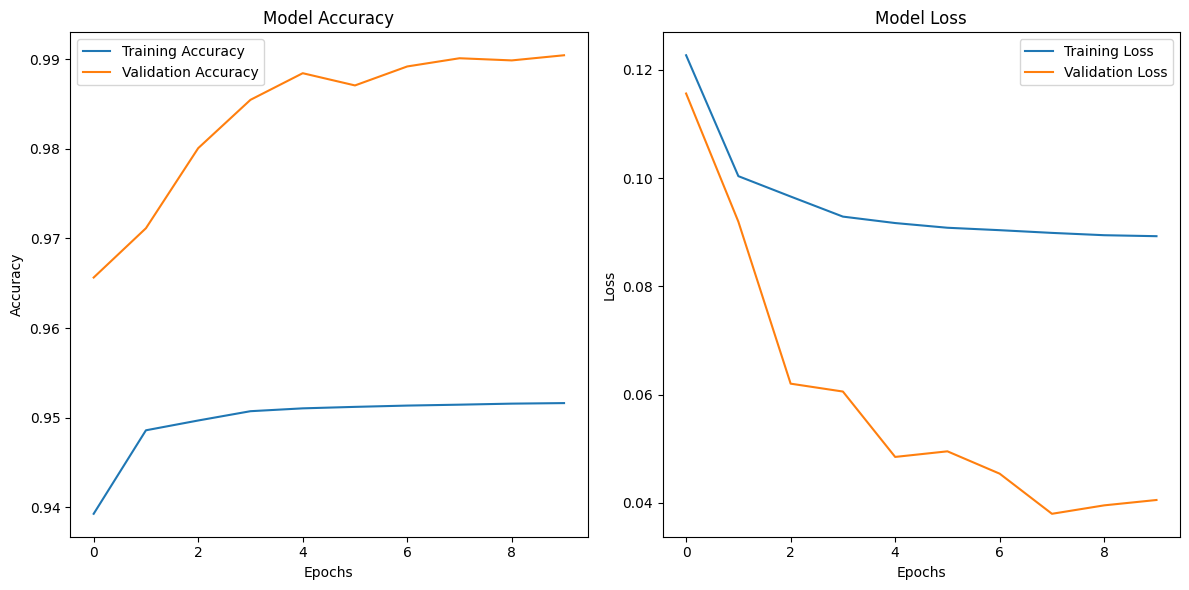

In [14]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\kartik\Desktop\Preprocessed dataset.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Selected features
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

# Features and target
X = df[selected_features]
y = df['Label']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42, n_jobs=-1)  # Use all available cores
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Reshape for CNN (samples, timesteps, features)
X_train_resampled = np.expand_dims(X_train_resampled, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# One-hot encode labels
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Set a custom learning rate
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Define the CNN model with 50% more neurons
model = models.Sequential([
    layers.Conv1D(194, 3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)),  # 128 -> 192 filters
    layers.MaxPooling1D(2),
    layers.Conv1D(388, 3, activation='relu'),  # 256 -> 384 filters
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(388, activation='relu'),  # 256 -> 384 neurons
    layers.Dropout(0.5),
    layers.Dense(y_train_resampled.shape[1], activation='softmax')  # Output layer remains unchanged
])

# Compile the model with custom learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, 
                    epochs=10, batch_size=128, 
                    validation_data=(X_test, y_test))

# Save the updated model
model.save('cnn_model_55_percent_more_neurons.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions for classification metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [5]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\kartik\Desktop\Preprocessed dataset.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Selected features
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

# Features and target
X = df[selected_features]
y = df['Label']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42, n_jobs=-1)  # Use all available cores
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Reshape for CNN (samples, timesteps, features)
X_train_resampled = np.expand_dims(X_train_resampled, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# One-hot encode labels
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Set a custom learning rate
learning_rate = 0.00008
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Define the CNN model with 50% more neurons
model = models.Sequential([
    layers.Conv1D(196, 3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)),  # 128 -> 192 filters
    layers.MaxPooling1D(2),
    layers.Conv1D(390, 3, activation='relu'),  # 256 -> 384 filters
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(390, activation='relu'),  # 256 -> 384 neurons
    layers.Dropout(0.5),
    layers.Dense(y_train_resampled.shape[1], activation='softmax')  # Output layer remains unchanged
])

# Compile the model with custom learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, 
                    epochs=20, batch_size=128, 
                    validation_data=(X_test, y_test))

# Save the updated model
model.save('cnn_model_55_percent_more_neurons.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions for classification metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

In [ ]:
import pandas as pd

df = pd.read_csv(r'D:\Kartikey\.venv\balanced.csv')



c:\Users\kartik\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
c:\Users\kartik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7305 - loss: 1.1355 - val_accuracy: 0.9494 - val_loss: 0.1888
Epoch 2/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9530 - loss: 0.1965 - val_accuracy: 0.9699 - val_loss: 0.1173
Epoch 3/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9640 - loss: 0.1391 - val_accuracy: 0.9767 - val_loss: 0.0894
Epoch 4/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9746 - loss: 0.1039 - val_accuracy: 0.9781 - val_loss: 0.0786
Epoch 5/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9751 - loss: 0.0943 - val_accuracy: 0.9772 - val_loss: 0.0749
Epoch 6/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9768 - loss: 0.0889 - val_accuracy: 0.9789 - val_loss: 0.0665
Epoch 7/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9787 - loss: 0.0784 - val_accuracy: 0.9818 - val_loss: 0.0608
Epoch 8/30
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9803 - loss: 0.0750 - val_accu

Test Accuracy: 99.22%
406/406 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
                  precision    recall  f1-score   support

          BENIGN       0.98      0.98      0.98      1500
            DDoS       1.00      1.00      1.00      1500
   DoS GoldenEye       0.99      1.00      0.99      1500
        DoS Hulk       0.98      0.99      0.99      1500
DoS Slowhttptest       0.99      0.99      0.99      1500
   DoS slowloris       0.99      0.99      0.99      1500
     FTP-Patator       0.99      1.00      1.00      1500
   Other Attacks       0.99      0.99      0.99       966
        PortScan       1.00      1.00      1.00      1500

        accuracy                           0.99     12966
       macro avg       0.99      0.99      0.99     12966
    weighted avg       0.99      0.99      0.99     12966



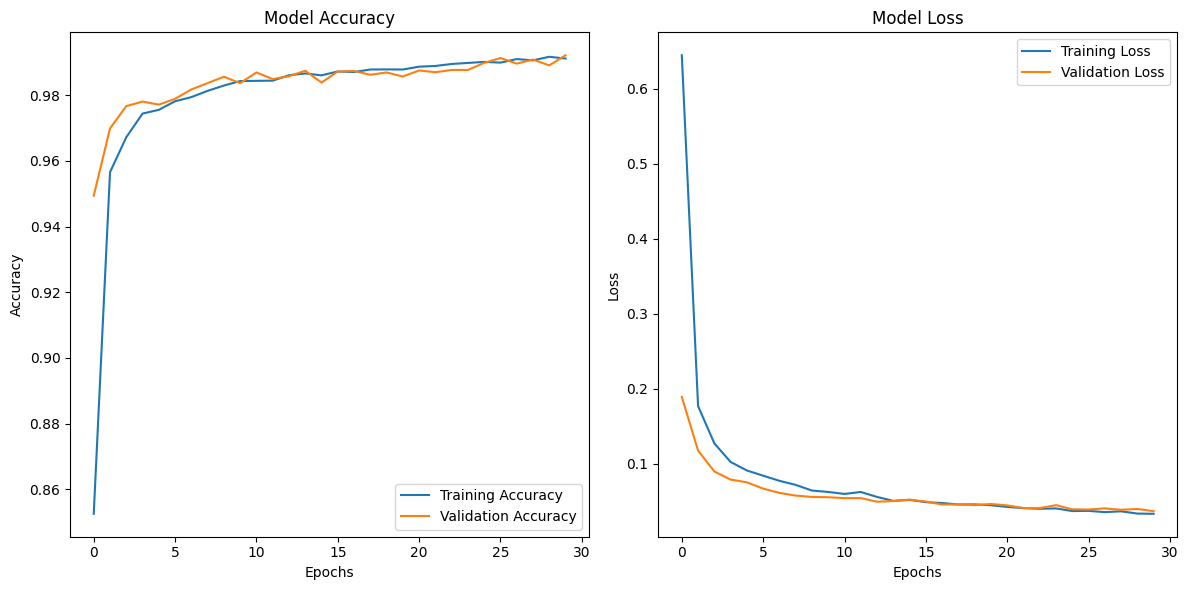

In [6]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'D:\Kartikey\.venv\balanced.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Selected features
selected_features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
    'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
    'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length',
    'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
    'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
    'URG Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size',
    'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
    'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

# Features and target
X = df[selected_features]
y = df['Attack Type']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42, n_jobs=-1)  # Use all available cores
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Reshape for CNN (samples, timesteps, features)
X_train_resampled = np.expand_dims(X_train_resampled, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# One-hot encode labels
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)

# Set a custom learning rate
learning_rate = 0.00008
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Define the CNN model with 50% more neurons
model = models.Sequential([
    layers.Conv1D(196, 3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)),  # 128 -> 192 filters
    layers.MaxPooling1D(2),
    layers.Conv1D(390, 3, activation='relu'),  # 256 -> 384 filters
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(390, activation='relu'),  # 256 -> 384 neurons
    layers.Dropout(0.5),
    layers.Dense(y_train_resampled.shape[1], activation='softmax')  # Output layer remains unchanged
])

# Compile the model with custom learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, 
                    epochs=30, batch_size=128, 
                    validation_data=(X_test, y_test))

# Save the updated model
model.save('Balanced_cnn_model_55_percent_more_neurons.h5')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions for classification metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.tight_layout()
plt.show()

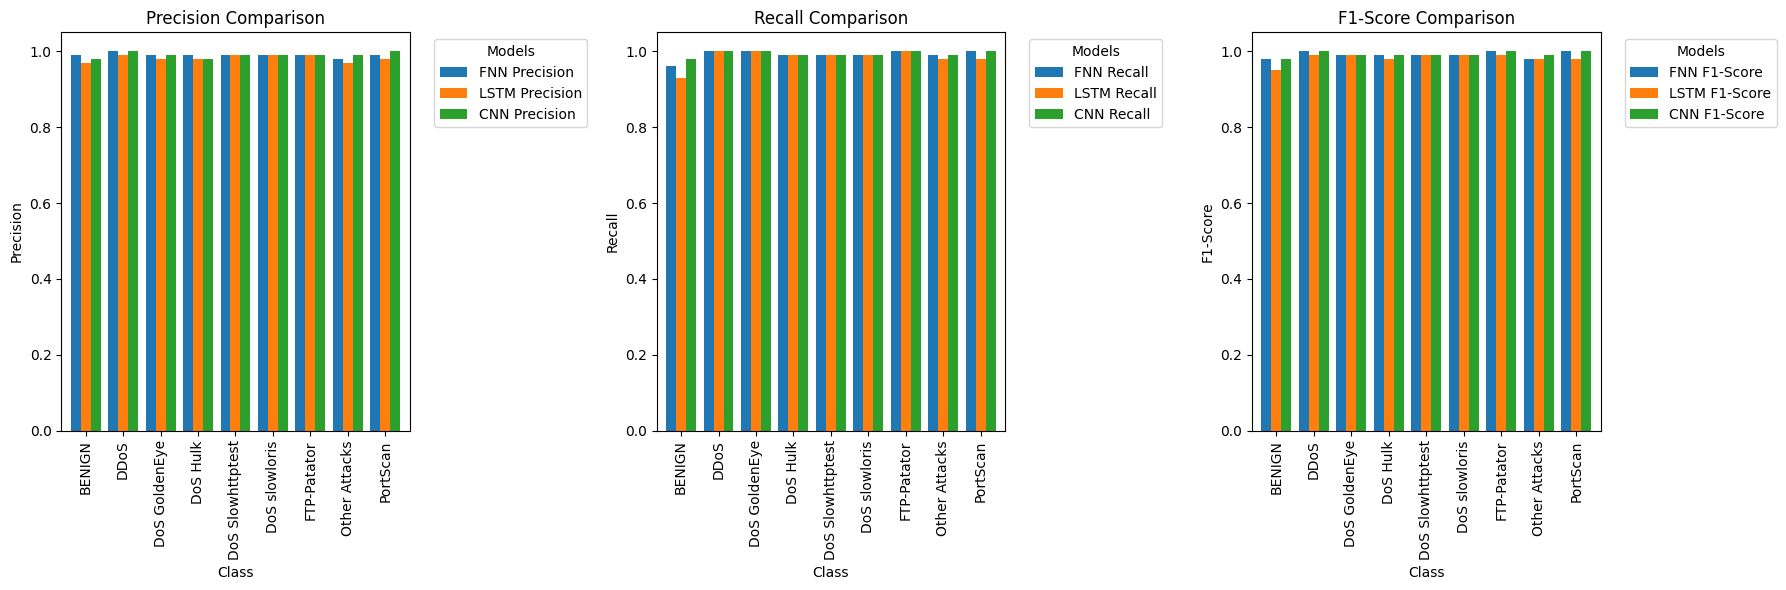

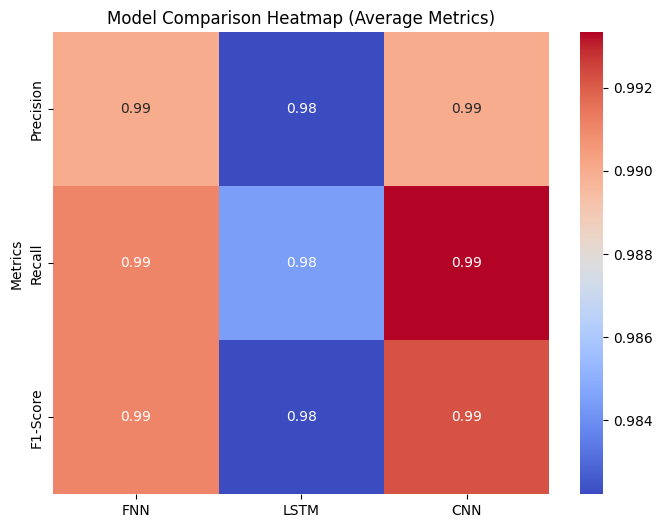

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the classification reports (precision, recall, f1-score for each model)
data = {
    'Class': ['BENIGN', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest', 'DoS slowloris', 
              'FTP-Patator', 'Other Attacks', 'PortScan'],
    'FNN Precision': [0.99, 1.00, 0.99, 0.99, 0.99, 0.99, 0.99, 0.98, 0.99],
    'FNN Recall': [0.96, 1.00, 1.00, 0.99, 0.99, 0.99, 1.00, 0.99, 1.00],
    'FNN F1-Score': [0.98, 1.00, 0.99, 0.99, 0.99, 0.99, 1.00, 0.98, 1.00],
    
    'LSTM Precision': [0.97, 0.99, 0.98, 0.98, 0.99, 0.99, 0.99, 0.97, 0.98],
    'LSTM Recall': [0.93, 1.00, 1.00, 0.99, 0.99, 0.99, 1.00, 0.98, 0.98],
    'LSTM F1-Score': [0.95, 0.99, 0.99, 0.98, 0.99, 0.99, 0.99, 0.98, 0.98],
    
    'CNN Precision': [0.98, 1.00, 0.99, 0.98, 0.99, 0.99, 0.99, 0.99, 1.00],
    'CNN Recall': [0.98, 1.00, 1.00, 0.99, 0.99, 0.99, 1.00, 0.99, 1.00],
    'CNN F1-Score': [0.98, 1.00, 0.99, 0.99, 0.99, 0.99, 1.00, 0.99, 1.00]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the class as the index
df.set_index('Class', inplace=True)

# Plotting comparison bar graph for precision, recall, and f1-score for FNN, LSTM, CNN
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for precision
df[['FNN Precision', 'LSTM Precision', 'CNN Precision']].plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Precision Comparison')
axes[0].set_ylabel('Precision')
axes[0].set_xlabel('Class')
axes[0].legend(title='Models', bbox_to_anchor=(1.05, 1))

# Bar plot for recall
df[['FNN Recall', 'LSTM Recall', 'CNN Recall']].plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_title('Recall Comparison')
axes[1].set_ylabel('Recall')
axes[1].set_xlabel('Class')
axes[1].legend(title='Models', bbox_to_anchor=(1.05, 1))

# Bar plot for f1-score
df[['FNN F1-Score', 'LSTM F1-Score', 'CNN F1-Score']].plot(kind='bar', ax=axes[2], width=0.8)
axes[2].set_title('F1-Score Comparison')
axes[2].set_ylabel('F1-Score')
axes[2].set_xlabel('Class')
axes[2].legend(title='Models', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

# Heatmap of the metrics (precision, recall, and f1-score for each model)
metrics = ['Precision', 'Recall', 'F1-Score']
heatmap_data = pd.DataFrame({
    'FNN': df[['FNN Precision', 'FNN Recall', 'FNN F1-Score']].mean().values,
    'LSTM': df[['LSTM Precision', 'LSTM Recall', 'LSTM F1-Score']].mean().values,
    'CNN': df[['CNN Precision', 'CNN Recall', 'CNN F1-Score']].mean().values
}, index=metrics)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Model Comparison Heatmap (Average Metrics)')
plt.ylabel('Metrics')
plt.show()


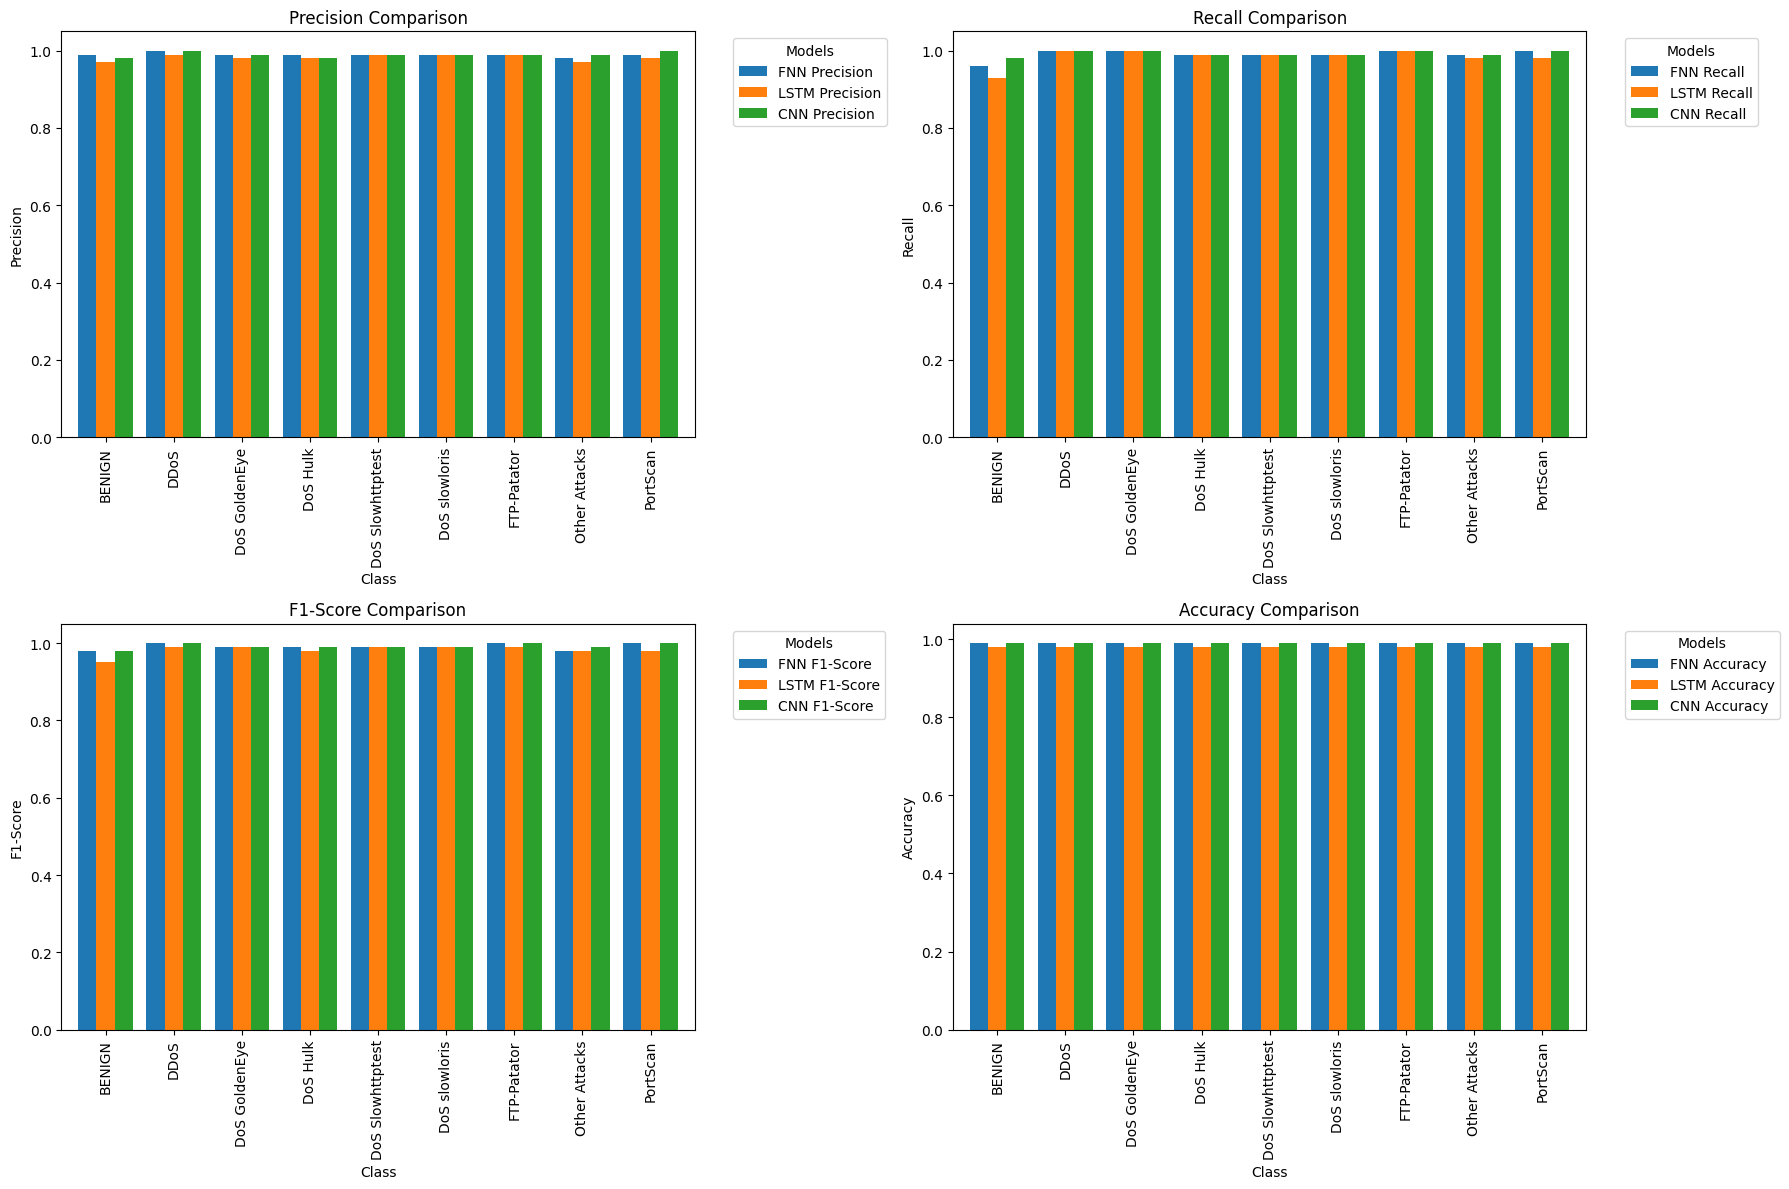

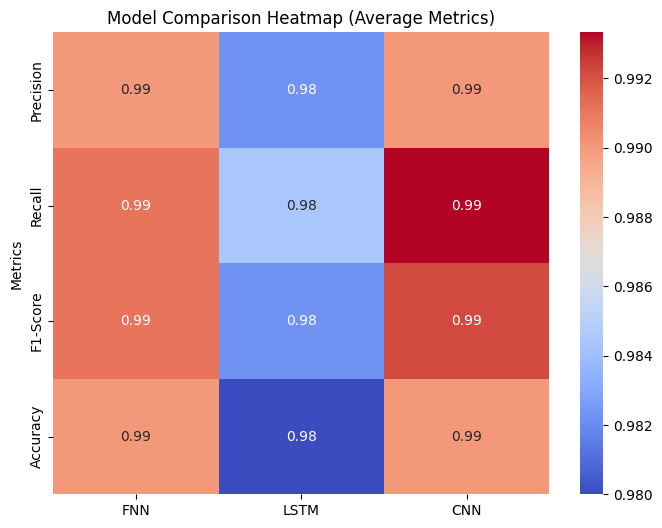

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the classification reports (precision, recall, f1-score for each model)
data = {
    'Class': ['BENIGN', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest', 'DoS slowloris', 
              'FTP-Patator', 'Other Attacks', 'PortScan'],
    'FNN Precision': [0.99, 1.00, 0.99, 0.99, 0.99, 0.99, 0.99, 0.98, 0.99],
    'FNN Recall': [0.96, 1.00, 1.00, 0.99, 0.99, 0.99, 1.00, 0.99, 1.00],
    'FNN F1-Score': [0.98, 1.00, 0.99, 0.99, 0.99, 0.99, 1.00, 0.98, 1.00],
    'FNN Accuracy': [0.99]*9,  # Assuming accuracy is consistent across all classes for simplicity
    
    'LSTM Precision': [0.97, 0.99, 0.98, 0.98, 0.99, 0.99, 0.99, 0.97, 0.98],
    'LSTM Recall': [0.93, 1.00, 1.00, 0.99, 0.99, 0.99, 1.00, 0.98, 0.98],
    'LSTM F1-Score': [0.95, 0.99, 0.99, 0.98, 0.99, 0.99, 0.99, 0.98, 0.98],
    'LSTM Accuracy': [0.98]*9,  # Assuming accuracy is consistent across all classes for simplicity
    
    'CNN Precision': [0.98, 1.00, 0.99, 0.98, 0.99, 0.99, 0.99, 0.99, 1.00],
    'CNN Recall': [0.98, 1.00, 1.00, 0.99, 0.99, 0.99, 1.00, 0.99, 1.00],
    'CNN F1-Score': [0.98, 1.00, 0.99, 0.99, 0.99, 0.99, 1.00, 0.99, 1.00],
    'CNN Accuracy': [0.99]*9,  # Assuming accuracy is consistent across all classes for simplicity
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the class as the index
df.set_index('Class', inplace=True)

# Plotting comparison bar graph for precision, recall, f1-score, and accuracy for FNN, LSTM, CNN
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Bar plot for precision
df[['FNN Precision', 'LSTM Precision', 'CNN Precision']].plot(kind='bar', ax=axes[0, 0], width=0.8)
axes[0, 0].set_title('Precision Comparison')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_xlabel('Class')
axes[0, 0].legend(title='Models', bbox_to_anchor=(1.05, 1))

# Bar plot for recall
df[['FNN Recall', 'LSTM Recall', 'CNN Recall']].plot(kind='bar', ax=axes[0, 1], width=0.8)
axes[0, 1].set_title('Recall Comparison')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].set_xlabel('Class')
axes[0, 1].legend(title='Models', bbox_to_anchor=(1.05, 1))

# Bar plot for f1-score
df[['FNN F1-Score', 'LSTM F1-Score', 'CNN F1-Score']].plot(kind='bar', ax=axes[1, 0], width=0.8)
axes[1, 0].set_title('F1-Score Comparison')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].set_xlabel('Class')
axes[1, 0].legend(title='Models', bbox_to_anchor=(1.05, 1))

# Bar plot for accuracy
df[['FNN Accuracy', 'LSTM Accuracy', 'CNN Accuracy']].plot(kind='bar', ax=axes[1, 1], width=0.8)
axes[1, 1].set_title('Accuracy Comparison')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_xlabel('Class')
axes[1, 1].legend(title='Models', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

# Heatmap of the metrics (precision, recall, f1-score for each model)
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
heatmap_data = pd.DataFrame({
    'FNN': df[['FNN Precision', 'FNN Recall', 'FNN F1-Score', 'FNN Accuracy']].mean().values,
    'LSTM': df[['LSTM Precision', 'LSTM Recall', 'LSTM F1-Score', 'LSTM Accuracy']].mean().values,
    'CNN': df[['CNN Precision', 'CNN Recall', 'CNN F1-Score', 'CNN Accuracy']].mean().values
}, index=metrics)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Model Comparison Heatmap (Average Metrics)')
plt.ylabel('Metrics')
plt.show()


In [1]:
print("hellow")

hellow
